# Iris Flower

# Exploratory data 

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [2]:
data = pd.read_csv('IRIS_ Flower_Dataset.csv')

In [3]:
data.head()

sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [6]:
data.describe()

sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

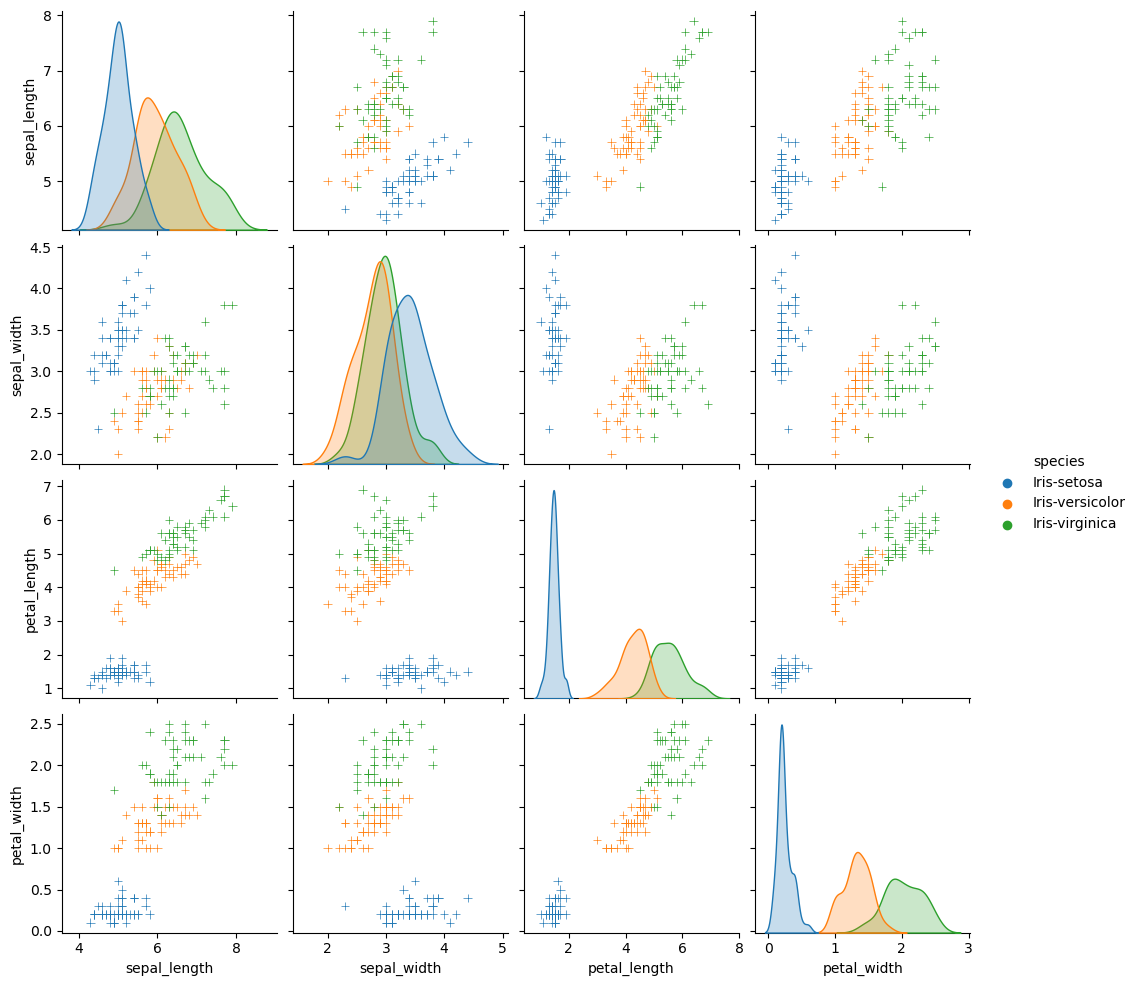

In [7]:
sns.pairplot(data,hue='species',markers='+')
plt.show()

<Axes: xlabel='species', ylabel='petal_length'>

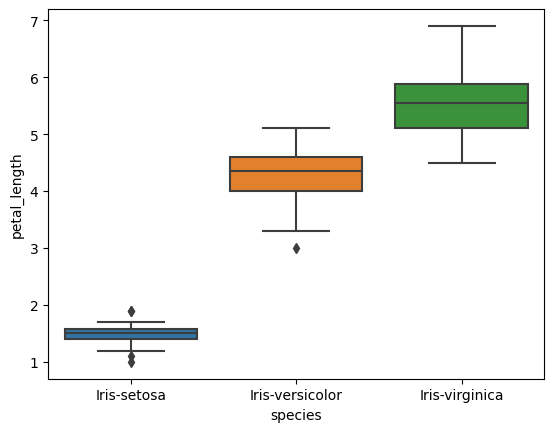

In [8]:
sns.boxplot(x = "species", y = "petal_length", data = data)

<Axes: xlabel='species', ylabel='sepal_length'>

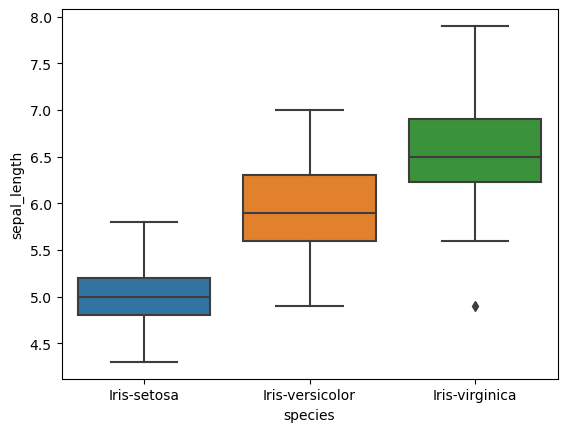

In [9]:
sns.boxplot(x = "species", y = "sepal_length", data = data)

C:\Users\smils\AppData\Local\Temp\ipykernel_19612\238302715.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


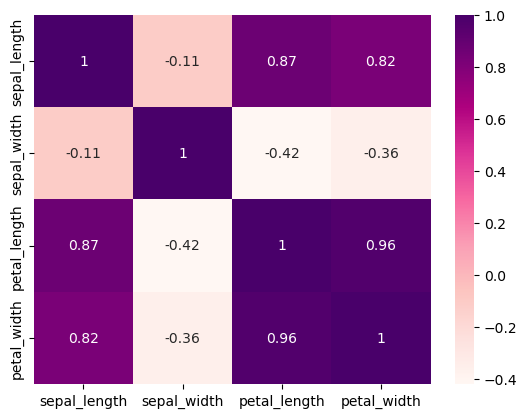

In [10]:
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='RdPu')
plt.show()

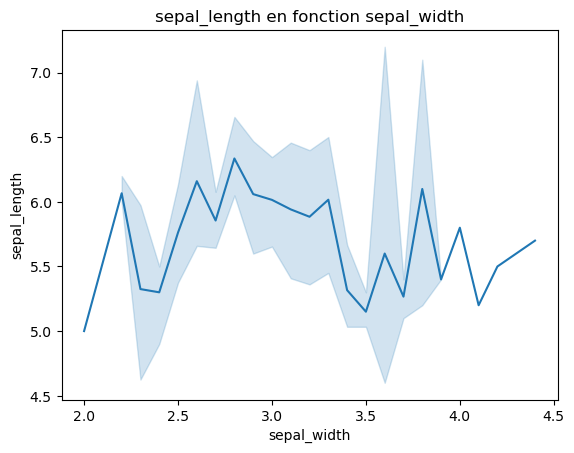

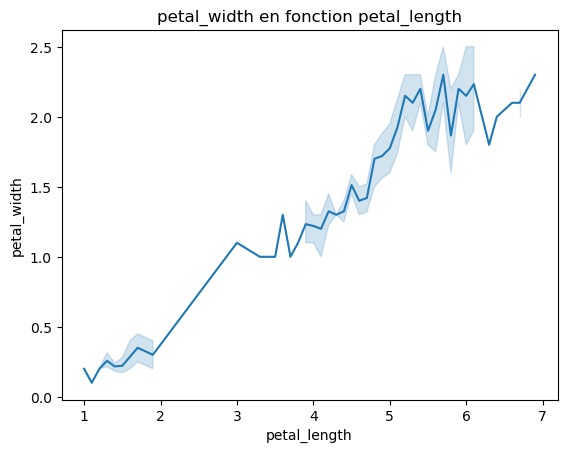

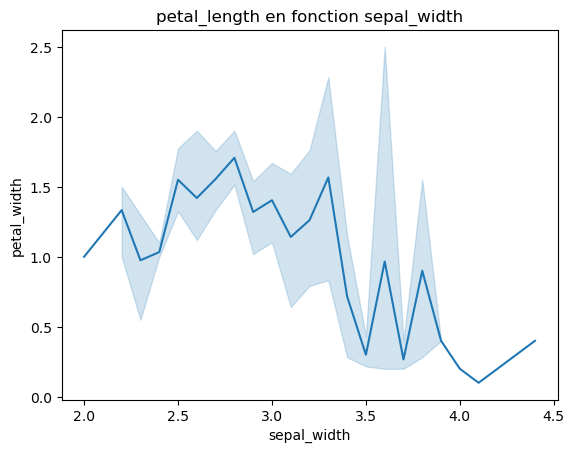

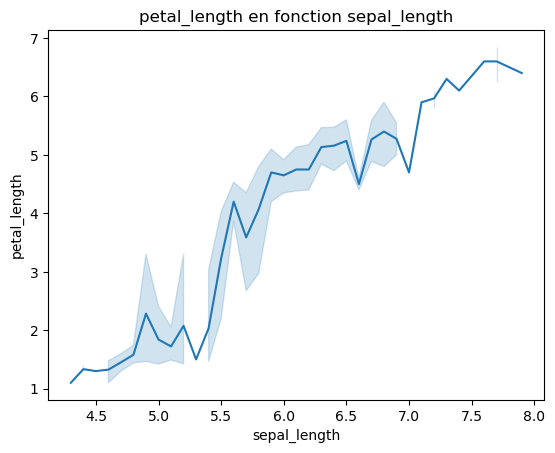

In [11]:
sns.lineplot(x="sepal_width", y="sepal_length", data=data)
plt.title("sepal_length en fonction sepal_width")
plt.show()
sns.lineplot(x="petal_length", y="petal_width", data=data)
plt.title("petal_width en fonction petal_length")
plt.show()

sns.lineplot(x="sepal_width", y="petal_width", data=data)
plt.title("petal_length en fonction sepal_width")
plt.show()


sns.lineplot(x="sepal_length", y="petal_length", data=data)
plt.title("petal_length en fonction sepal_length")
plt.show()

# Cleaning the data

In [12]:
data['species'].replace(['Iris-setosa','Iris-versicolor','Iris-virginica'],[0,1,2],inplace=True)

In [13]:
data.head()

sepal_length  sepal_width  petal_length  petal_width  species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0

# Train -Test

In [14]:
from sklearn.model_selection import train_test_split 
X = data.drop(['species'], axis=1)
y = data['species']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [16]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=50, criterion='entropy', random_state=42)
model.fit(X_train, y_train)
print('Train score: ', model.score(X_train, y_train))
print('test score: ', model.score(X_test, y_test))

Train score:  1.0
test score:  0.9333333333333333


In [17]:
y_pred = model.predict(X_test)
y_pred

array([1, 2, 2, 0, 2, 1, 0, 2, 0, 1, 1, 1, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2,
       0, 1, 1, 2, 1, 1, 1, 2], dtype=int64)

In [18]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
rep = classification_report(y_test, y_pred)
print(rep)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.91      0.91      0.91        11
           2       0.91      0.91      0.91        11

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.93      0.93      0.93        30



In [19]:
conf_mat =  confusion_matrix(y_test, y_pred)
print(conf_mat)

[[ 8  0  0]
 [ 0 10  1]
 [ 0  1 10]]


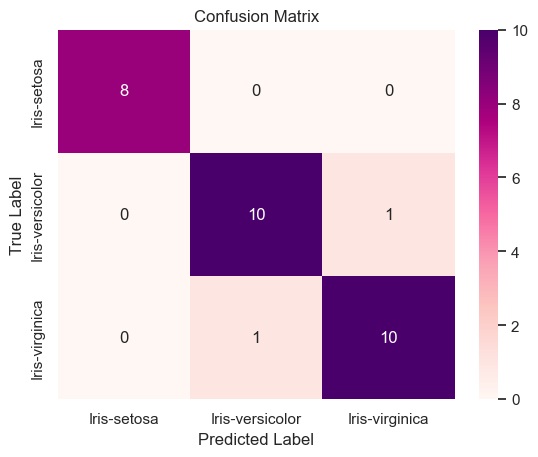

In [20]:
sns.set()
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="RdPu", xticklabels=["Iris-setosa", "Iris-versicolor", "Iris-virginica"], yticklabels=["Iris-setosa", "Iris-versicolor", "Iris-virginica"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [21]:
feature_names = X.columns.values.tolist()
print(feature_names)
features = pd.Series(model.feature_importances_,index=feature_names).sort_values(ascending=False)
features

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']


petal_width     0.473662
petal_length    0.407654
sepal_length    0.102930
sepal_width     0.015754
dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


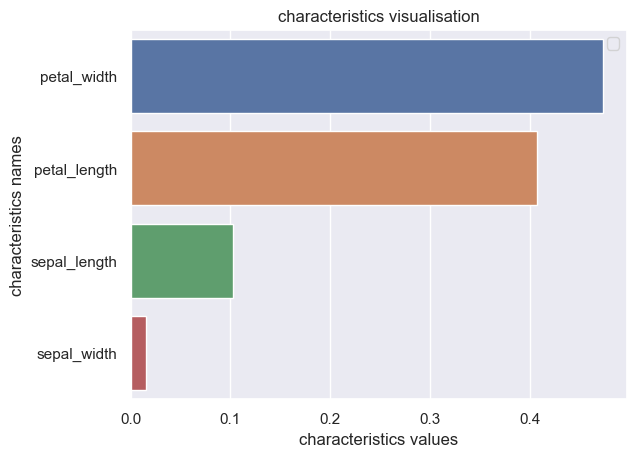

In [22]:
sns.barplot(x=features, y=features.index)
plt.xlabel('characteristics values')
plt.ylabel('characteristics names')
plt.title("characteristics visualisation")
plt.legend()
plt.show()

In [23]:
from sklearn.model_selection import learning_curve

[ 9 19 28 38 48 57 67 76 86 96]


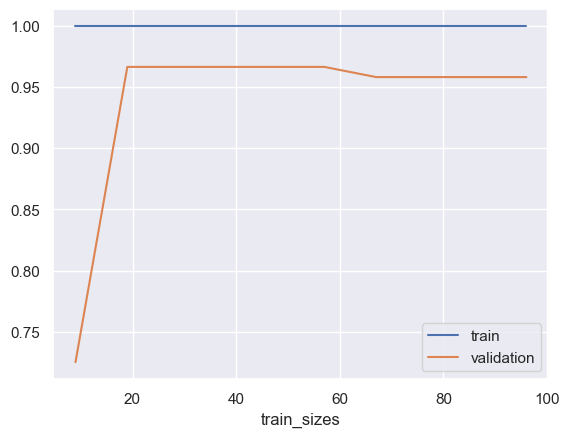

In [24]:
N, train_score, val_score = learning_curve(model, X_train, y_train, train_sizes= np.linspace(0.1,1,10), cv=5)
print(N)
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()

The end